# Plotting results collated by `get_results.py`

## Imports & plot configs

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from linclab_utils import plot_utils
plot_utils.linclab_plt_defaults(font="Arial")

In [2]:
colors_arr = ['blue', 'red', 'gold', 'magenta', 'brown']
markers_arr = ['o', 'x', '^', 'v', 's']

## Utils

In [3]:
def get_alphas_and_acc(data_dict, dset_split, methods=None):
    if methods is None:
        methods = list(data_dict.keys())
    feats_alpha_res_dict = {}
    prefeats_alpha_res_dict = {}

    for key in data_dict.keys():
        if key not in methods: continue
        if key not in feats_alpha_res_dict.keys():
            feats_alpha_res_dict[key] = {'alphas': [], 'acc': []}
            prefeats_alpha_res_dict[key] = {'alphas': [], 'acc': []}
        for hparam in data_dict[key].keys():
            feats_alpha_res_dict[key]['alphas'].append(
                data_dict[key][hparam][dset_split]['feats_alpha'])
            feats_alpha_res_dict[key]['acc'].append(
                data_dict[key][hparam][dset_split]['acc'])
            prefeats_alpha_res_dict[key]['alphas'].append(
                data_dict[key][hparam][dset_split]['prefeats_alpha'])
            prefeats_alpha_res_dict[key]['acc'].append(
                data_dict[key][hparam][dset_split]['acc'])
    
    return feats_alpha_res_dict, prefeats_alpha_res_dict

def plot_results(feats_alpha_dict, prefeats_alpha_dict, dset_split):
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    for kidx,key in enumerate(feats_alpha_dict.keys()):
        plt.scatter(feats_alpha_dict[key]['alphas'],
                    feats_alpha_dict[key]['acc'],
                    c=colors_arr[kidx],marker=markers_arr[kidx],
                    label=key)
    plt.ylabel(f'{dset_split} Accuracy')
    plt.xlabel(rf'{dset_split} $\alpha$')
    plt.title('Features')
    plt.legend()

    plt.subplot(212)
    for kidx,key in enumerate(prefeats_alpha_dict.keys()):
        plt.scatter(prefeats_alpha_dict[key]['alphas'],
                    prefeats_alpha_dict[key]['acc'],
                    c=colors_arr[kidx],marker=markers_arr[kidx],
                    label=key)
    plt.ylabel(f'{dset_split} Accuracy')
    plt.xlabel(rf'{dset_split} $\alpha$')
    plt.title('Prefeatures')
    plt.legend()

## Loading the data

In [4]:
# A = np.load('result_collated_28-07-2023_01-53-21.npy',allow_pickle=True).item()
A = np.load('result_collated_04-08-2023_15-03-23.npy',allow_pickle=True).item()
A.keys()

dict_keys(['ar', 'pada', 'ba3us', 'jumbot', 'mpot'])

In [5]:
for k in A.keys():
    print(k,len(A[k].keys()))

ar 24
pada 5
ba3us 25
jumbot 132
mpot 237


## Results

### Source split

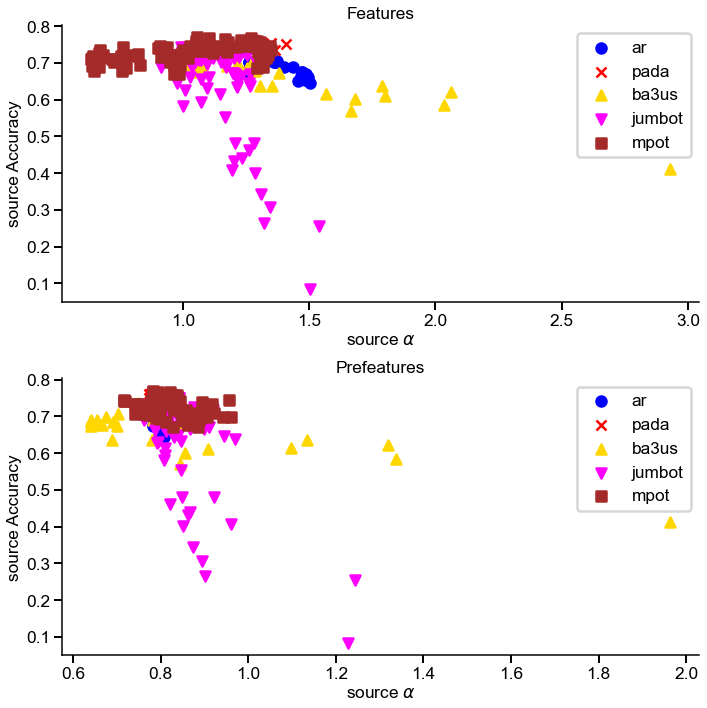

In [7]:
dset = 'source'
methods = ['ar', 'pada', 'ba3us', 'mpot', 'jumbot']
feats_alpha_res_dict, prefeats_alpha_res_dict = get_alphas_and_acc(A, dset, methods=methods)
plot_results(feats_alpha_res_dict, prefeats_alpha_res_dict, dset) 

### Validation split

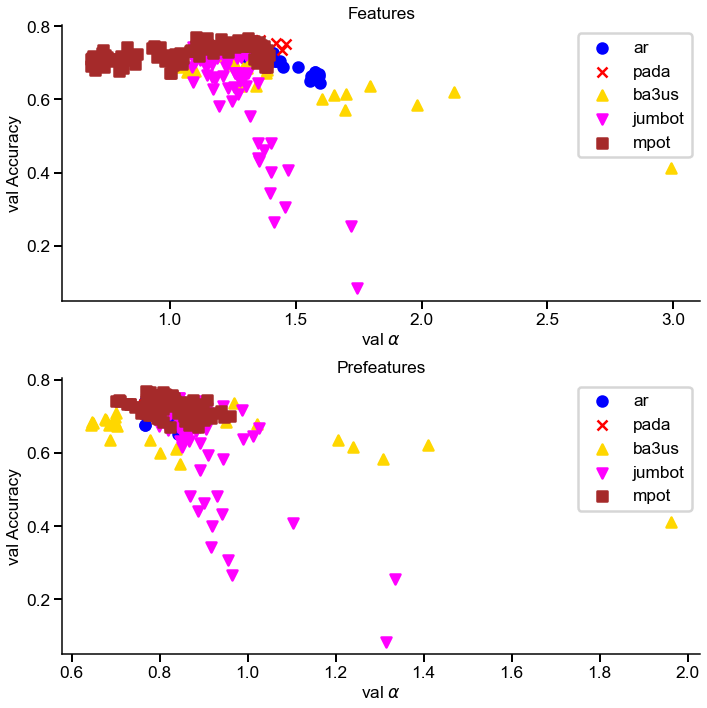

In [8]:
dset = 'val'
methods = ['ar', 'pada', 'ba3us', 'mpot', 'jumbot']
feats_alpha_res_dict, prefeats_alpha_res_dict = get_alphas_and_acc(A, dset, methods=methods)
plot_results(feats_alpha_res_dict, prefeats_alpha_res_dict, dset) 

### Target domain split

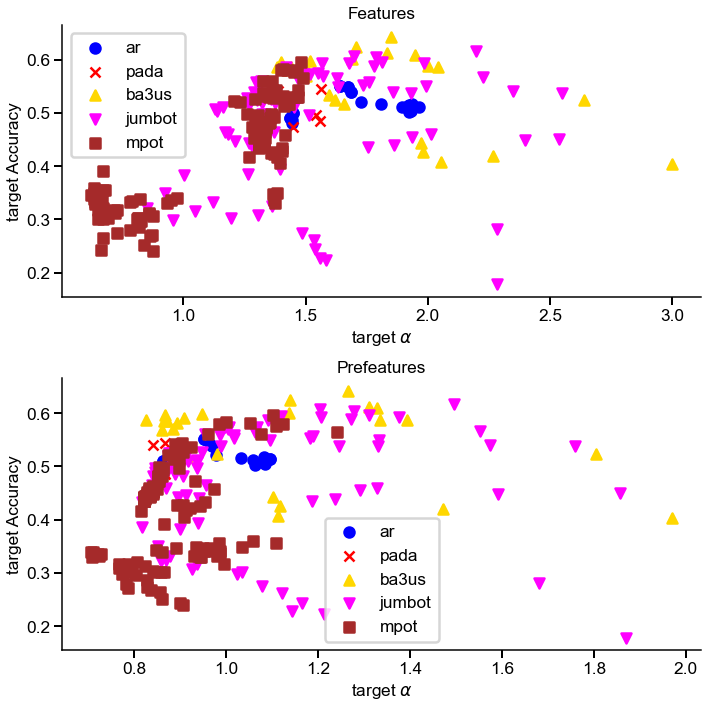

In [9]:
dset = 'target'
methods = ['ar', 'pada', 'ba3us', 'mpot', 'jumbot']
feats_alpha_res_dict, prefeats_alpha_res_dict = get_alphas_and_acc(A, dset, methods=methods)
plot_results(feats_alpha_res_dict, prefeats_alpha_res_dict, dset) 

Text(0.5, 0, 'Val acc')

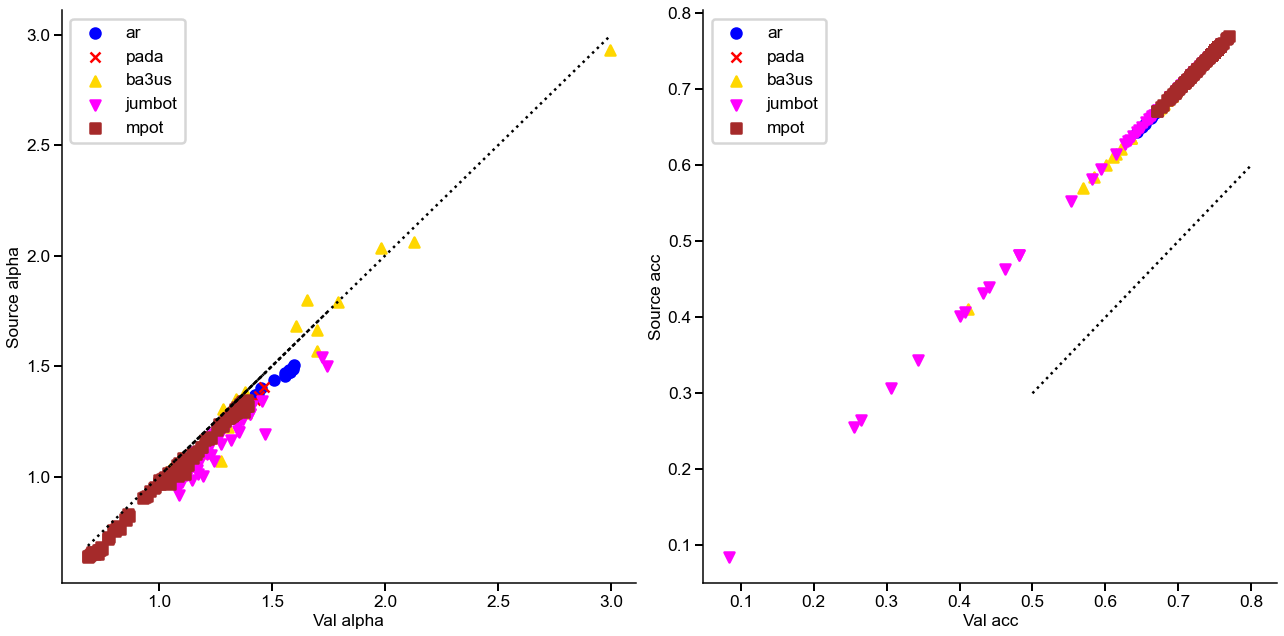

In [10]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 's_alphas': [], 's_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 's_alphas': [], 's_acc': []}
    for hparam in A[key].keys():
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['s_alphas'].append(
            A[key][hparam]['source']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['s_acc'].append(
            A[key][hparam]['source']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['s_alphas'].append(
            A[key][hparam]['source']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['s_acc'].append(
            A[key][hparam]['source']['acc'])
        

plot_res_dict = feats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_alphas'],
                plot_res_dict[key]['s_alphas'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)

    plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            ls=':', color='k')
plt.legend()
plt.ylabel('Source alpha')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['s_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Source acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

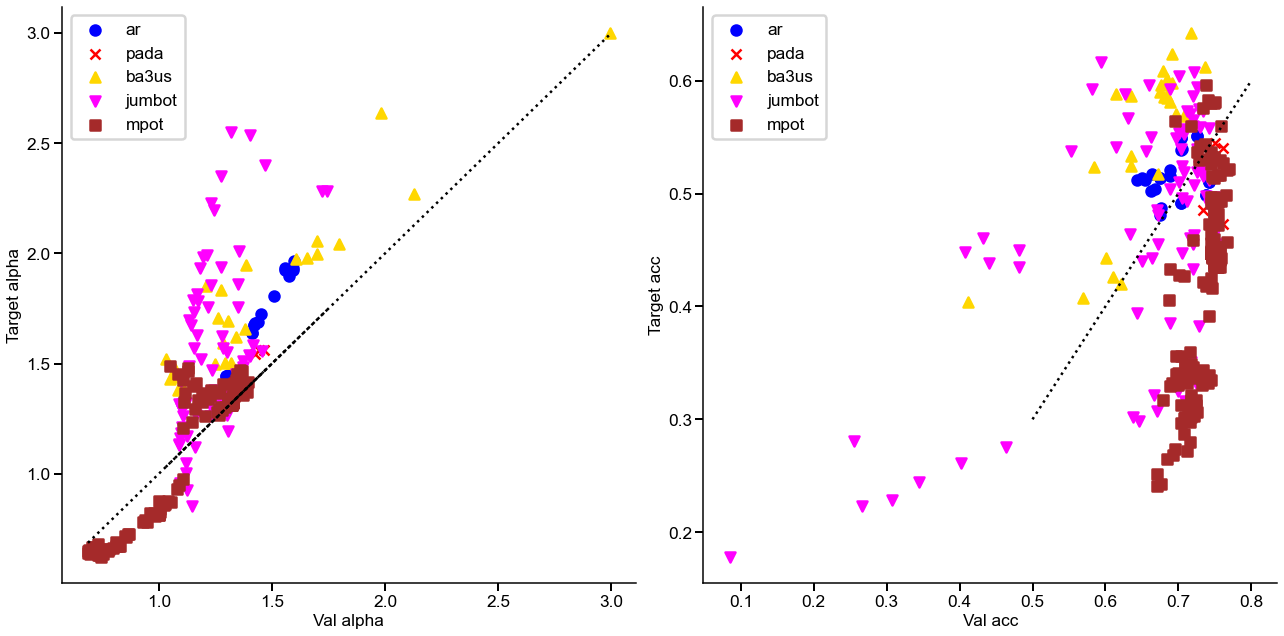

In [11]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
    for hparam in A[key].keys():
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        

plot_res_dict = feats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_alphas'],
                plot_res_dict[key]['t_alphas'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)

    plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            ls=':', color='k')
plt.legend()
plt.ylabel('Target alpha')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Target acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

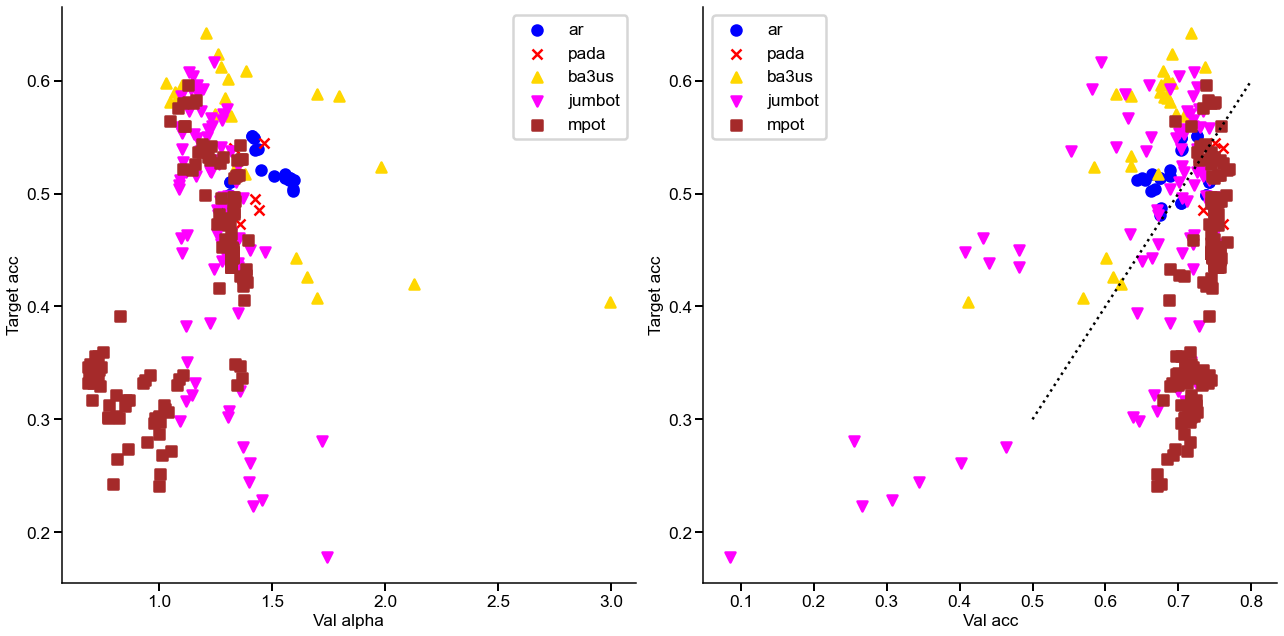

In [30]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
    for hparam in A[key].keys():
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        

plot_res_dict = feats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_alphas'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)

    # plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
    #                     max(plot_res_dict[key]['v_alphas']),100), 
    #         np.linspace(min(plot_res_dict[key]['v_alphas']),
    #                     max(plot_res_dict[key]['v_alphas']),100), 
    #         ls=':', color='k')
plt.legend()
plt.ylabel('Target acc')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Target acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

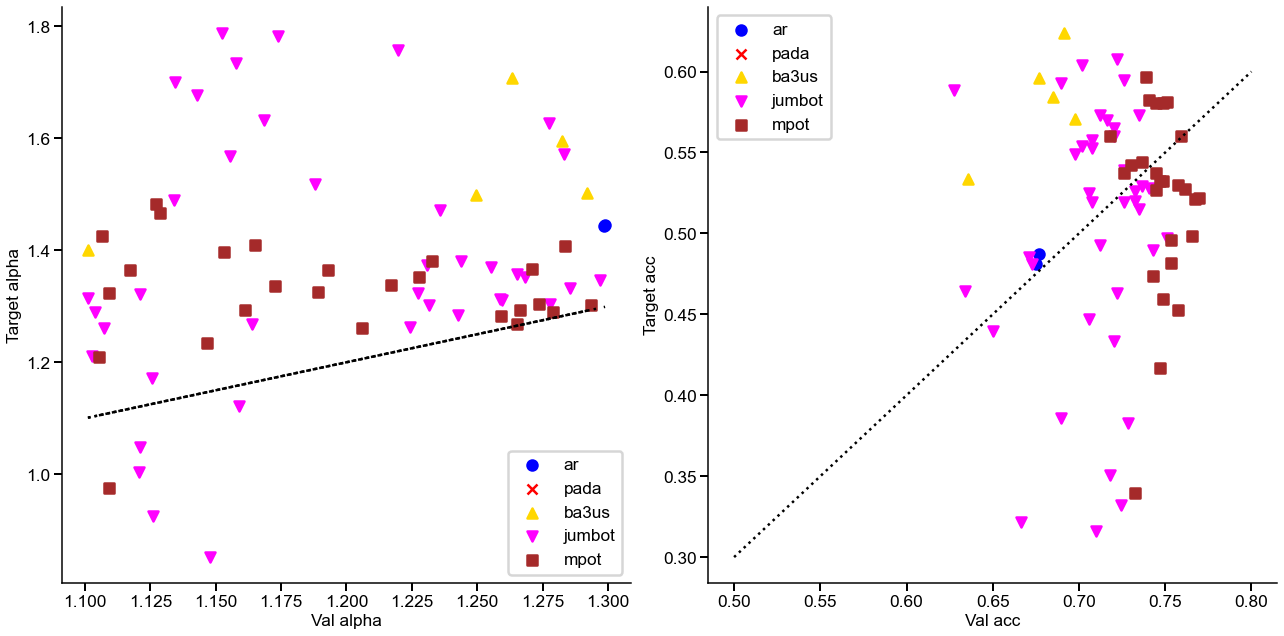

In [32]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
    for hparam in A[key].keys():

        if not (1.1 <= A[key][hparam]['val']['feats_alpha'] <= 1.3): continue   # filter for sweet spot in val alpha
        if A[key][hparam]['target']['feats_alpha'] > 1.8: continue              # filter for not too high target alpha
        # filter for models that perform poorly on val dataset
        if A[key][hparam]['val']['acc'] < 0.5: continue
        # simpler target dataset: filter for higher alpha on target, lower alpha is too low alphas
        # if A[key][hparam]['target']['feats_alpha'] < A[key][hparam]['val']['feats_alpha']: continue
        
        
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        

plot_res_dict = feats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    try:
        plt.scatter(plot_res_dict[key]['v_alphas'],
                    plot_res_dict[key]['t_alphas'],
                    c=colors_arr[kidx],marker=markers_arr[kidx],
                    label=key)

        plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
                            max(plot_res_dict[key]['v_alphas']),100), 
                np.linspace(min(plot_res_dict[key]['v_alphas']),
                            max(plot_res_dict[key]['v_alphas']),100), 
                ls=':', color='k')
    except:
        pass
plt.legend()
plt.ylabel('Target alpha')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Target acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

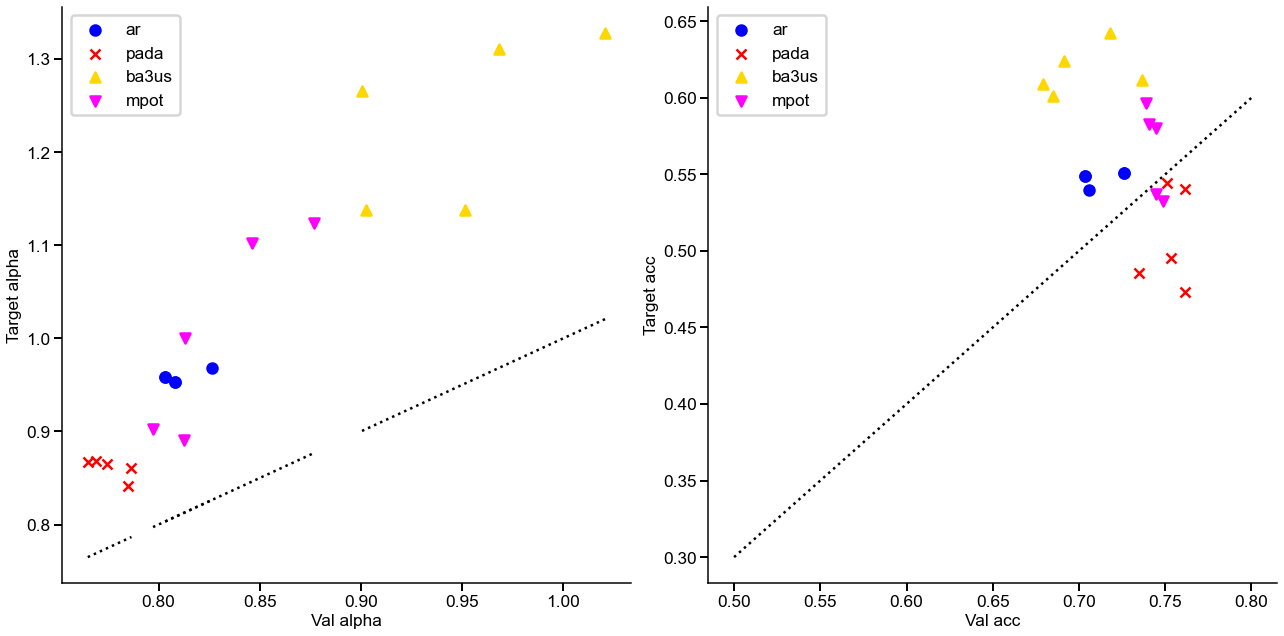

In [104]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
    
    log_dict_list = [(key, item['target']['acc']) for key, item in A[key].items()]
    log_dict_list.sort(key=lambda x: x[1])
    log_dict_list = log_dict_list[::-1]
    best_performing_hparams = [item[0] for item in log_dict_list[:5]]

    for hparam in A[key].keys():
        if hparam not in best_performing_hparams:
            continue
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        
plot_res_dict = prefeats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_alphas'],
                plot_res_dict[key]['t_alphas'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)

    plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            np.linspace(min(plot_res_dict[key]['v_alphas']),
                        max(plot_res_dict[key]['v_alphas']),100), 
            ls=':', color='k')
plt.legend()
plt.ylabel('Target alpha')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Target acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

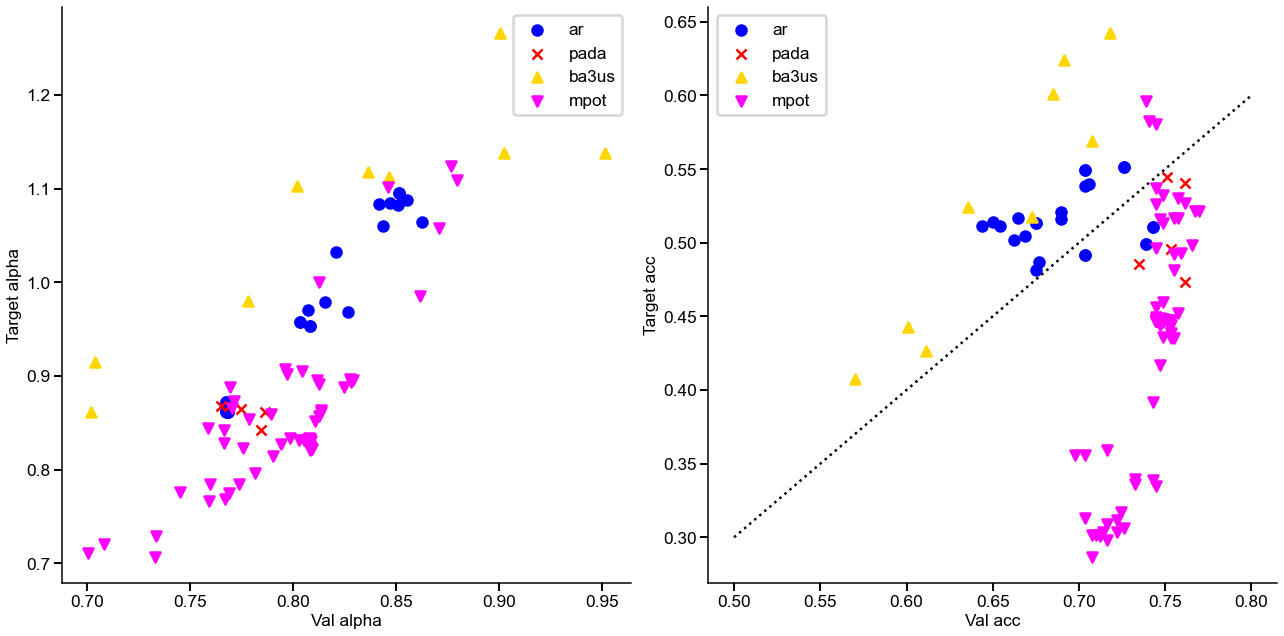

In [111]:
feats_alpha_res_dict = {}
prefeats_alpha_res_dict = {}

for key in A.keys():
    if key not in methods: continue
    if key not in feats_alpha_res_dict.keys():
        feats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
        prefeats_alpha_res_dict[key] = {'v_alphas': [], 'v_acc': [], 't_alphas': [], 't_acc': []}
    
    log_dict_list = [(key, item['val']['prefeats_alpha'], item['target']['prefeats_alpha']) for key, item in A[key].items()]
    # log_dict_list.sort(key=lambda x: x[1])
    # log_dict_list = log_dict_list[::-1]
    # best_performing_hparams = [item[0] for item in log_dict_list[:5]]
    best_performing_hparams = [item[0] for item in log_dict_list if 0.7 <= item[1] <= 1.3 and 0.7 <= item[2] <= 1.3]

    for hparam in A[key].keys():
        if hparam not in best_performing_hparams:
            continue
        feats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['feats_alpha'])
        feats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['feats_alpha'])
        feats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        feats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        prefeats_alpha_res_dict[key]['v_alphas'].append(
            A[key][hparam]['val']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['t_alphas'].append(
            A[key][hparam]['target']['prefeats_alpha'])
        prefeats_alpha_res_dict[key]['v_acc'].append(
            A[key][hparam]['val']['acc'])
        prefeats_alpha_res_dict[key]['t_acc'].append(
            A[key][hparam]['target']['acc'])
        
plot_res_dict = prefeats_alpha_res_dict
plt.figure(figsize=(18,9))
plt.subplot(121)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_alphas'],
                plot_res_dict[key]['t_alphas'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)

    # plt.plot(np.linspace(min(plot_res_dict[key]['v_alphas']),
    #                     max(plot_res_dict[key]['v_alphas']),100), 
    #         np.linspace(min(plot_res_dict[key]['v_alphas']),
    #                     max(plot_res_dict[key]['v_alphas']),100), 
    #         ls=':', color='k')
plt.legend()
plt.ylabel('Target alpha')
plt.xlabel('Val alpha')

# plt.figure(figsize=(9,9))
plt.subplot(122)
for kidx,key in enumerate(plot_res_dict.keys()):
    plt.scatter(plot_res_dict[key]['v_acc'],
                plot_res_dict[key]['t_acc'],
                c=colors_arr[kidx],marker=markers_arr[kidx],
                label=key)
plt.legend()
plt.plot(np.linspace(0.5,0.8,100), np.linspace(0.5,0.8,100)-0.2, ls=':', color='k')
plt.ylabel('Target acc')
plt.xlabel('Val acc')

Text(0.5, 0, 'Val acc')

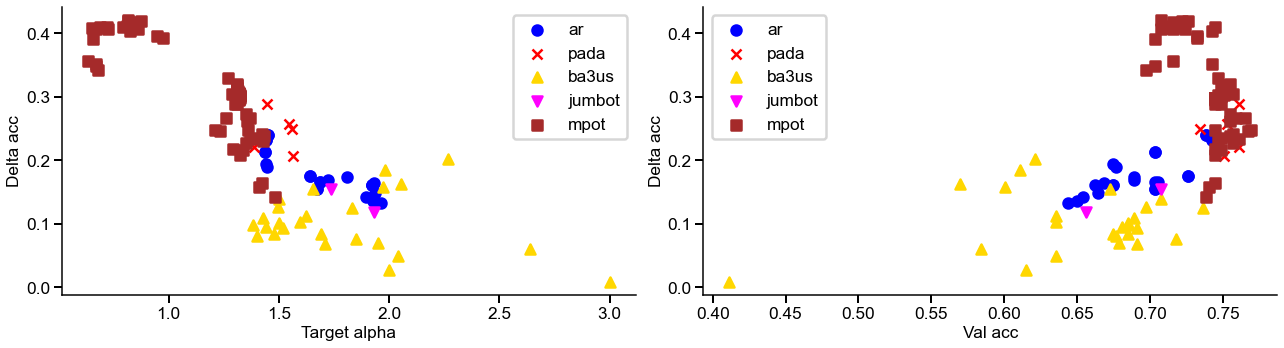

In [75]:
plt.figure(figsize=(18,5))
plt.subplot(121)
for kidx,key in enumerate(feats_alpha_res_dict.keys()):
    plt.scatter(
        # np.abs(np.array(feats_alpha_res_dict[key]['v_alphas'])-np.array(feats_alpha_res_dict[key]['t_alphas'])),
        feats_alpha_res_dict[key]['t_alphas'],
        np.abs(np.array(feats_alpha_res_dict[key]['v_acc'])-np.array(feats_alpha_res_dict[key]['t_acc'])),
        # feats_alpha_res_dict[key]['t_acc'],
        c=colors_arr[kidx],marker=markers_arr[kidx],
        label=key)
plt.legend()
plt.ylabel('Delta acc')
plt.xlabel('Target alpha')

plt.subplot(122)
for kidx,key in enumerate(feats_alpha_res_dict.keys()):
    plt.scatter(
        # np.abs(np.array(feats_alpha_res_dict[key]['v_alphas'])-np.array(feats_alpha_res_dict[key]['t_alphas'])),
        feats_alpha_res_dict[key]['v_acc'],
        np.abs(np.array(feats_alpha_res_dict[key]['v_acc'])-np.array(feats_alpha_res_dict[key]['t_acc'])),
        # feats_alpha_res_dict[key]['t_acc'],
        c=colors_arr[kidx],marker=markers_arr[kidx],
        label=key)
plt.legend()
plt.ylabel('Delta acc')
plt.xlabel('Val acc')

## Scratch

In [6]:
A['ar']['rho0_2.5_up_5.0_low_-5.0_ent_weight_0.1']

{'source': {'acc': 0.7263374485596708,
  'feats_alpha': 1.3438259729377782,
  'prefeats_alpha': 0.8014355659084423},
 'val': {'acc': 0.7263374485596708,
  'feats_alpha': 1.4098161368172197,
  'prefeats_alpha': 0.8083073616944735},
 'target': {'acc': 0.551044776119403,
  'feats_alpha': 1.6396317539616432,
  'prefeats_alpha': 0.9531104995151548}}